In [84]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [107]:
IMAGE_SIZE = 100
BATCH_SIZE = 32
EPOCHS = 50
CHANNELS = 3

In [86]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "apple data set",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 6404 files belonging to 13 classes.


In [87]:
class_names = dataset.class_names
class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2']

In [88]:
num_class = len(class_names)
num_class

13

In [89]:
len(dataset)

201

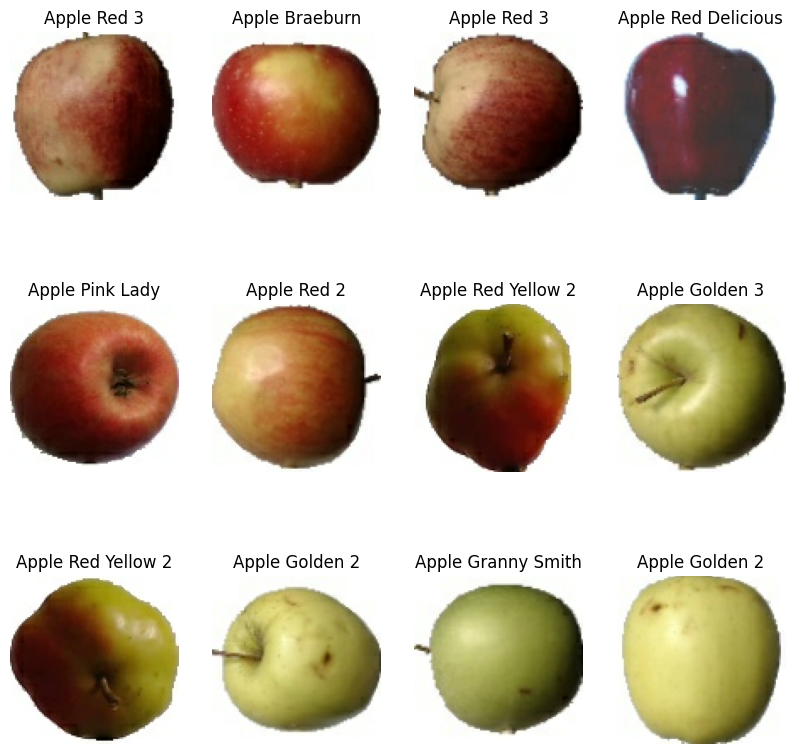

In [90]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [91]:
def get_trian_val_test_split_ds(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    if shuffle:
        ds.shuffle(shuffle_size, seed=99)
    
    train_size = int(train_split*len(ds))
    val_size = int(test_split*len(ds))
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [92]:
train_ds, val_ds, test_ds = get_trian_val_test_split_ds(dataset)

In [93]:
len(train_ds)

160

In [94]:
len(val_ds)

20

In [95]:
len(test_ds)

21

In [96]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [97]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [98]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [108]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(32, (3,3), activation='relu',padding = 'same', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3,3),padding = 'same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (3,3),padding = 'same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    #layers.Conv2D(128, (3,3),padding = 'same', activation='relu'),
    #layers.MaxPooling2D((2,2)),
    #layers.Dropout(0.25),
    
    #layers.Conv2D(64, (3,3),padding = 'same', activation='relu'),
    #layers.MaxPooling2D((2,2)),
    
    #layers.Conv2D(64, (3,3),padding = 'same', activation='relu'),
    #layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_class, activation='softmax')
    
])

model.build(input_shape=input_shape)

In [109]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_16 (Sequential)  (None, 100, 100, 3)       0         
                                                                 
 sequential_17 (Sequential)  (None, 100, 100, 3)       0         
                                                                 
 conv2d_68 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 dropout_65 (Dropout)        (None, 50, 50, 32)        0         
                                                                 
 conv2d_69 (Conv2D)          (None, 50, 50, 64)        18496     
                                                     

In [110]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [111]:
model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=val_ds
)

Epoch 1/30
160/160 [==============================] - 124s 752ms/step - loss: 1.4884 - accuracy: 0.4850 - val_loss: 0.4764 - val_accuracy: 0.8391
Epoch 2/30
 85/160 [==============>...............] - ETA: 1:00 - loss: 0.4055 - accuracy: 0.8445

KeyboardInterrupt: 

In [47]:
scores = model.evaluate(test_ds)

21/21 [==============================] - 3s 124ms/step - loss: 3.4107 - accuracy: 0.5699


In [ ]:
model_structure = model.to_jsonnsonsonson()
f = Path('model_structure.json')
f.write_text(model_structure)

In [ ]:
model.save_weights('model_weights.h5')